### Terrain analysis 

RichDEM documentation [here](https://richdem.readthedocs.io/en/latest/intro.html)

In [74]:
## Import libraries
import richdem as rd
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio

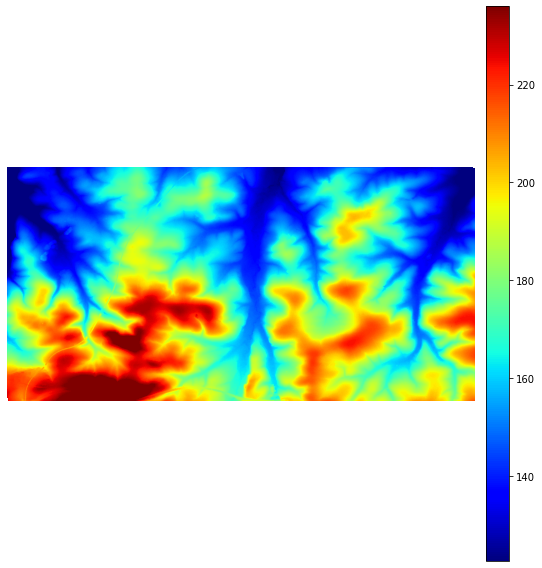

{'vmin': 122.6486244, 'vmax': 236.0}

In [29]:
# Load DEM and plot
dem  = rd.LoadGDAL("DEM_5m.tif")
rd.rdShow(dem, ignore_colours=[0], axes=False, cmap='jet', figsize=(8,8))

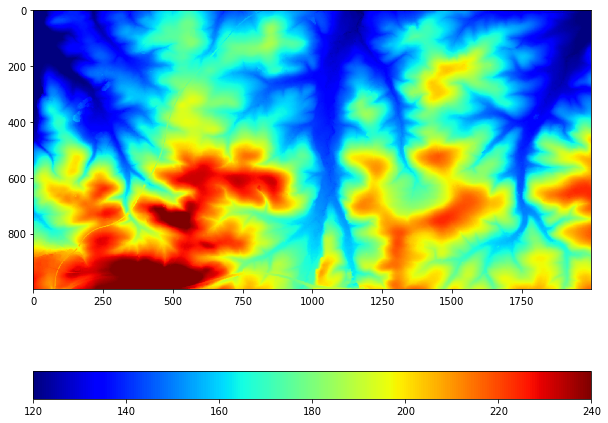

In [53]:
# Plotting
plt.figure(figsize = (10,10))
plt.imshow(dem, cmap = 'jet', interpolation = 'nearest', vmin = 120, vmax = 240)
plt.colorbar(location = 'bottom')
plt.show()

### Slope
> A slope map is a two-dimensional representation of the gradient of a surface

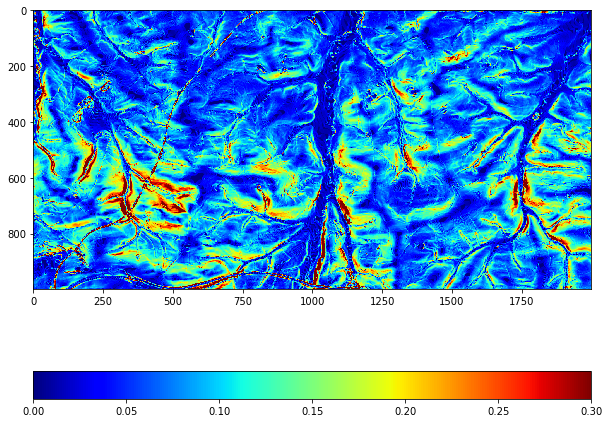

In [52]:
# Slope
slope = rd.TerrainAttribute(dem, attrib='slope_riserun')
plt.figure(figsize = (10,10))
plt.imshow(slope, cmap = 'jet', interpolation = 'nearest', vmin = 0, vmax = 0.3)
plt.colorbar(location = 'bottom')
plt.show()

### Aspect: 
> Aspect is defined as the orientation of the earth's surface with respect to the sun

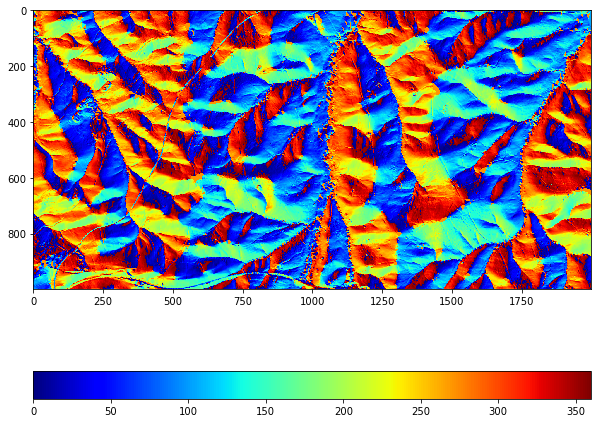

In [55]:
# Aspect
aspect = rd.TerrainAttribute(dem, attrib='aspect')
plt.figure(figsize = (10,10))
plt.imshow(aspect, cmap = 'jet', interpolation = 'nearest', vmin = 0, vmax = 360)
plt.colorbar(location = 'bottom')
plt.show()

## Curvatures: Planform and profile curvature
> The profile curvature affects the acceleration and deceleration of flow and, therefore, influences erosion and deposition. The plan curvature influences convergence and divergence of flow. Considering both plan and profile curvature together allows us to understand more accurately the flow across a surface. An explanation [here](https://www.esri.com/arcgis-blog/products/product/imagery/understanding-curvature-rasters/#:~:text=The%20profile%20curvature%20affects%20the,the%20flow%20across%20a%20surface.)

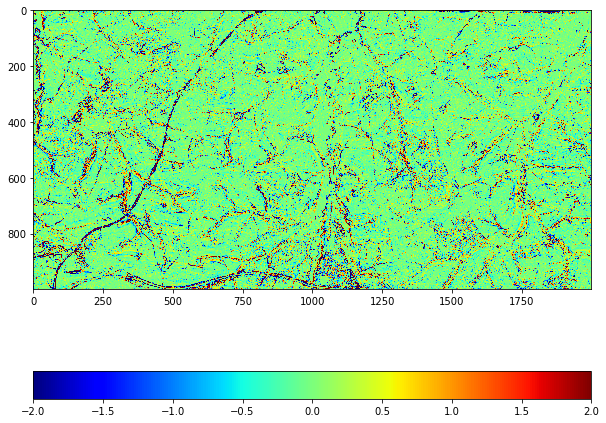

In [56]:
# Profile curvature
profile_curvature = rd.TerrainAttribute(dem, attrib='profile_curvature')
plt.figure(figsize = (10,10))
plt.imshow(profile_curvature, cmap = 'jet', interpolation = 'nearest', vmin = -2, vmax = 2)
plt.colorbar(location = 'bottom')
plt.show()

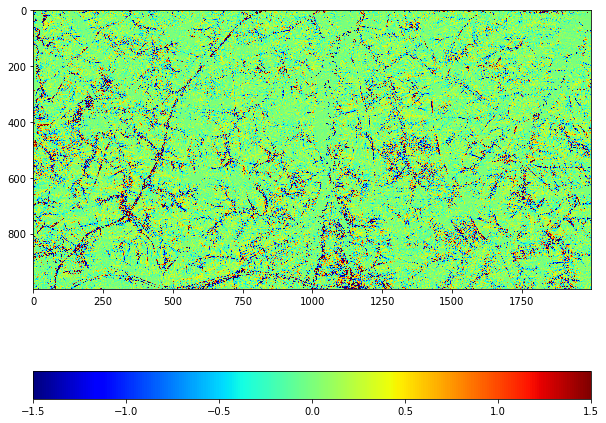

In [57]:
# Planform curvature
planform_curvature = rd.TerrainAttribute(dem, attrib='planform_curvature')
plt.figure(figsize = (10,10))
plt.imshow(planform_curvature, cmap = 'jet', interpolation = 'nearest', vmin = -1.5, vmax = 1.5)
plt.colorbar(location = 'bottom')
plt.show()

In [63]:
# Make a stack and export
## Load raster to take the metadata
with rio.open('C:/Users/neliq/Documents/NIF/Rothamsted/rasters/preditoras/2012/DEM_5m.tif') as covs:
    dem_array = covs.read()
    dem_meta = covs.profile

In [82]:
output_stack = "C:/Users/neliq/Documents/NIF/Rothamsted/rasters/preditoras/2012/terrain_stack.tif"
output_meta = dem_meta.copy()
output_meta.update({"count": 6,"nodata": -10000})

file_list = [dem, slope, aspect, profile_curvature, planform_curvature, curvature]
with rio.open(output_stack, 'w', **output_meta) as dest:
    for band_nr, src in enumerate(file_list, start=1):
        dest.write(src, band_nr)

In [77]:
## End